In [120]:
import pandas as pd
import numpy as np

gender_pay = pd.read_csv('gender_pay.csv')
gender_pay.dropna(inplace=True)
print(gender_pay.shape)
gender_pay.head()

(142, 7)


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0


## Data

The data contains 558 entries of arranged into 7 columns.

All_workers: Number of workers in each occupation category
All_weekly: Weekly wage of all workers by category
M_workers/ F_workers: Number of male/ female workers in each occupation
M_weekly/ F_weekly: Weekly wage of male/ female workers 

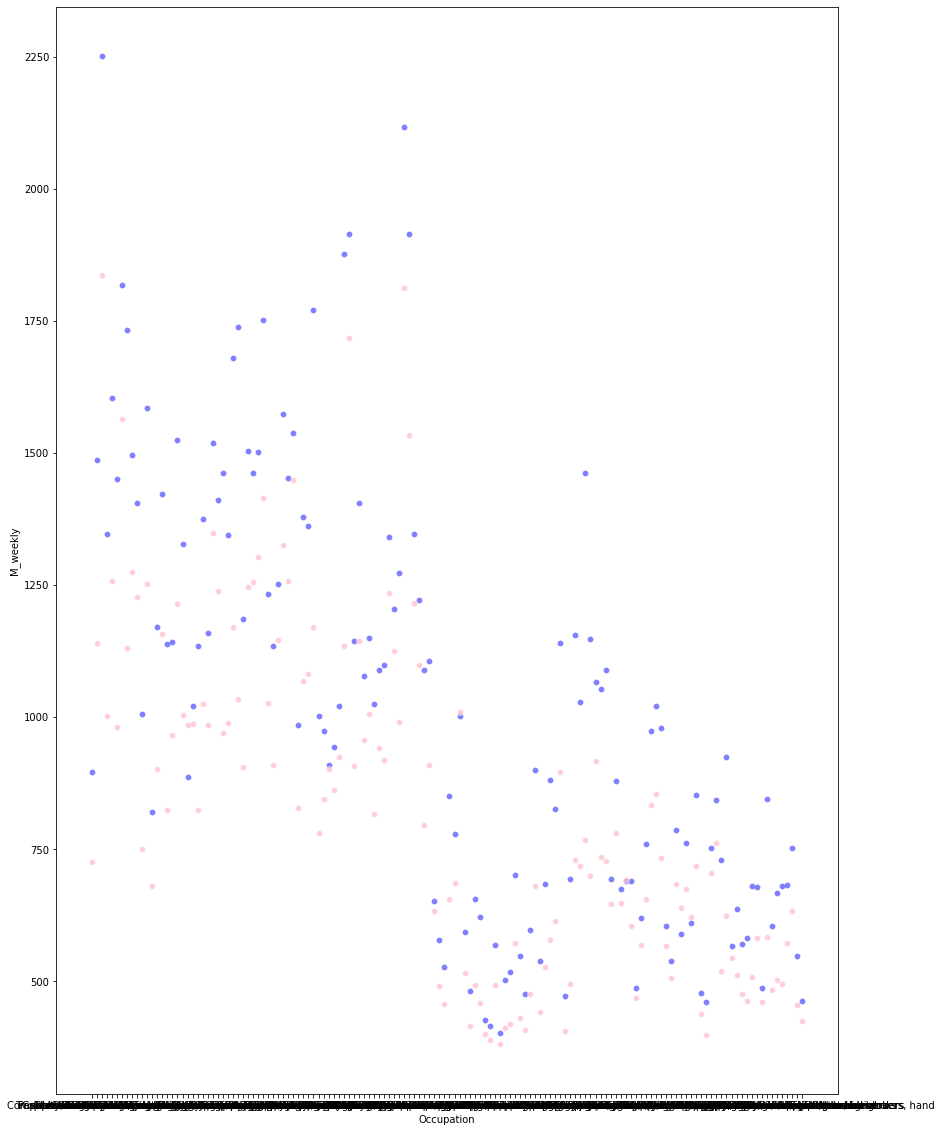

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,20))
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'M_weekly', color = 'blue', alpha =0.5)
sns.scatterplot(data = gender_pay, x = 'Occupation', y = 'F_weekly', color = 'pink', alpha =0.75)
plt.show()

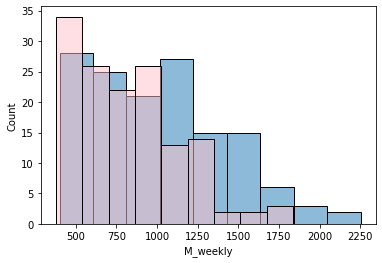

In [122]:
sns.histplot(data = gender_pay, x = 'M_weekly', alpha = 0.5)
sns.histplot(data = gender_pay, x = 'F_weekly', color = 'pink', alpha = 0.5)
plt.show()

### First glance shows a trend of men earning more than women

As can be seen there is a histogram broken down by gender. Both genders skew right with women clustered in lower pay ranges than men.

I intend to examine the data in two ways going foward:

1) look at which occupations where women earn more than men.

2) can a model be drawn to predict weekly wages based on gender and occupation.

In [123]:
women_higher = gender_pay[gender_pay['F_weekly'] >= gender_pay['M_weekly']]
women_higher.head(10)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
35,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0
304,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0
340,Data entry keyers,223,619.0,55,589.0,169,638.0
345,"Office clerks, general",929,620.0,156,609.0,773,622.0


### Women earned more than men in five occupations of this data set

The five occupations that women tended to earn more were typically office jobs such as office clerks, accountants and data entry. Women edged out men by 8 dollars weekly in the field of of patrol officers.

In general men earn more than women.

One thing the dataset has that can be usesful in identifying causes is which careers are more dominated by men and which are more dominated by women.

The original data frame has been modified to add two columns one being the ratio of male workers to female workers (M:F ratio) the other being the the ratio of pay for male workers compared to female workers (pay ratio).

In [124]:
gender_pay['M:F_Ratio'] = gender_pay['M_workers'] / gender_pay['F_workers']
gender_pay['pay_Ratio'] = gender_pay['M_weekly'] / gender_pay['F_weekly']
gender_pay.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,1.256796,1.232782
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,1.424519,1.304653
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245


<AxesSubplot:xlabel='M:F_Ratio', ylabel='Count'>

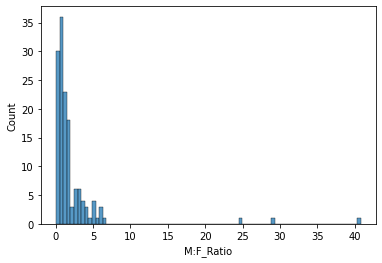

In [125]:
sns.histplot(data = gender_pay, x = 'M:F_Ratio')

Text(0.5, 1.0, 'M/F Ratio vs Pay Ratio')

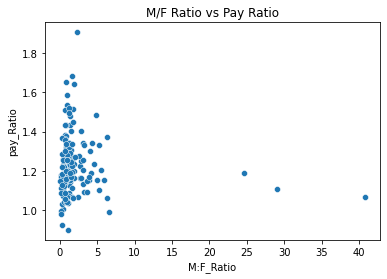

In [126]:
sns.scatterplot(data = gender_pay, x = 'M:F_Ratio', y = 'pay_Ratio' )
plt.title('M/F Ratio vs Pay Ratio')

It is difficult to see any kind of coorelation with oultiers of the male dominated fields such as Construction, Maintenance and drivers.

The data frames are broken down to see which fields have ratios of male to female workers greater than 10, between five and ten, between five and one, and female dominated fields.

In [127]:
outliers = gender_pay[gender_pay['M:F_Ratio'] > 10]
outliers.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
360,CONSTRUCTION,5722,749.0,5586,751.0,137,704.0,40.773723,1.066761
401,MAINTENANCE,4301,839.0,4159,842.0,143,761.0,29.083916,1.106439
528,Driver/sales workers and truck drivers,2687,747.0,2582,751.0,105,632.0,24.590476,1.188291


In [128]:
five_ten = gender_pay[(gender_pay['M:F_Ratio'] >= 5) & (gender_pay['M:F_Ratio'] < 10) ]
five_ten.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
78,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,5.932115,1.155131
96,"Engineers, all other",393,1527.0,339,1537.0,54,1448.0,6.277778,1.061464
130,Clergy,376,1002.0,316,1021.0,60,924.0,5.266667,1.104978
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,6.616279,0.992071
237,Chefs and head cooks,340,619.0,285,656.0,55,492.0,5.181818,1.333333


In [129]:
one_five = gender_pay[(gender_pay['M:F_Ratio'] >= 1.0) & (gender_pay['M:F_Ratio'] < 5) ]
one_five.head(66)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,1.256796,1.232782
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,1.424519,1.304653
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,2.696113,1.226035
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,3.074257,1.344311
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,1.507937,1.274245
...,...,...,...,...,...,...,...,...,...
451,"Food processing workers, all other",132,594.0,82,679.0,50,508.0,1.640000,1.336614
472,"Metal workers and plastic workers, all other",351,639.0,278,678.0,72,581.0,3.861111,1.166954
505,"Inspectors, testers, sorters, samplers, and we...",701,710.0,440,844.0,260,583.0,1.692308,1.447684
520,"Production workers, all other",846,625.0,643,666.0,203,501.0,3.167488,1.329341


In [130]:
female_dominated = gender_pay[(gender_pay['M:F_Ratio'] < 1.0)]
female_dominated.head(65)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
10,Financial managers,1124,1408.0,551,1732.0,573,1130.0,0.961606,1.532743
12,Human resources managers,254,1365.0,68,1495.0,186,1274.0,0.365591,1.173469
19,Education administrators,778,1423.0,282,1585.0,496,1252.0,0.568548,1.265974
24,Lodging managers,123,985.0,54,1171.0,68,902.0,0.794118,1.298226
25,Medical and health services managers,592,1210.0,154,1422.0,438,1156.0,0.351598,1.230104
...,...,...,...,...,...,...,...,...,...
442,"Electrical, electronics, and electromechanical...",123,554.0,59,566.0,64,544.0,0.921875,1.040441
446,Bakers,150,505.0,69,570.0,80,475.0,0.862500,1.200000
476,Laundry and dry-cleaning workers,133,466.0,53,487.0,80,460.0,0.662500,1.058696
508,Packaging and filling machine operators and te...,239,518.0,118,605.0,120,482.0,0.983333,1.255187


In [131]:
female_higher = gender_pay[(gender_pay['pay_Ratio'] < 1.0)]
female_higher.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,M:F_Ratio,pay_Ratio
35,"Wholesale and retail buyers, except farm products",142,926.0,73,886.0,69,985.0,1.057971,0.899492
228,Police and sheriff's patrol officers,655,1002.0,569,1001.0,86,1009.0,6.616279,0.992071
304,"Bookkeeping, accounting, and auditing clerks",769,692.0,87,690.0,682,692.0,0.127566,0.997110
340,Data entry keyers,223,619.0,55,589.0,169,638.0,0.325444,0.923197
345,"Office clerks, general",929,620.0,156,609.0,773,622.0,0.201811,0.979100


In [132]:
gender_pay.describe()
per_female = (48334 / 109080) * 100
print(per_female)
print(100 - per_female)

44.31059772643931
55.68940227356069


## Observations from exploratory analysis

After removing incomplete data, there are 142 listed occupations with a total of 109038 workers (448
Of the 142 occupations, 137 occupations men have a higher weekly pay and 5 occupations women have a higher weekly pay.

77 Occupations had M:F ratios greater than 1 and 65 occupations had M:F ratios < 1.

Of the data set 44.31 % of workers are female and 55.69 % are male.

## Project Goals

Examine the data using graphs to identify if there are any trends or clusters that can be used to generate a machine learning model to predict weekly pay based on gender, gender ratio and/ or pay ratio.

<AxesSubplot:xlabel='pay_Ratio', ylabel='All_weekly'>

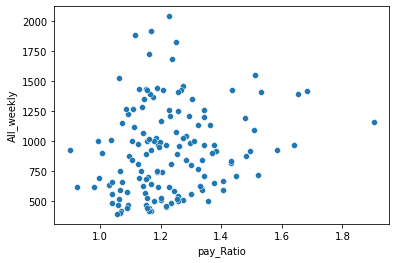

In [133]:
sns.scatterplot(data = gender_pay, x = 'pay_Ratio', y = 'All_weekly')

Based on the above plot, it appears that as the pay ratio increases, for most jobs the weekly pay for all workers increases. It also appears that most jobs that cluser around a pay ratio of 1.2 and some of those jobs result in higher pay for all workers, significanlty higher than those jobs with higher M:F pay raiots.

In the next cell I swapped the x-y axis to see how the pay ratio changes as the jobs weekly pay increases.

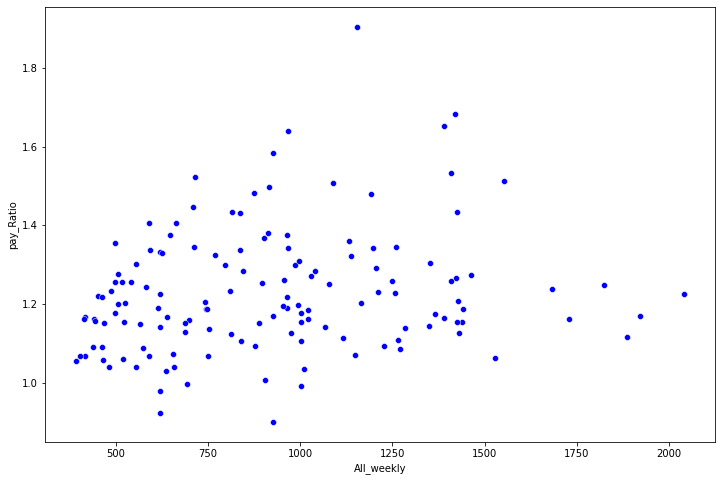

In [134]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = gender_pay, y = 'pay_Ratio', x = 'All_weekly',color = 'blue')
plt.show()

## A trend emerges?

When plotting the weekly pay of all workers vs the pay_ratio there looks to be a slight up trend in pay ratio as the the weekly pay rises. To further examine the gender differences I broke these down by gender and attempted to fit a linear regression model to each data.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
regr = LinearRegression()
regr_m = LinearRegression()
regr_f = LinearRegression()
y = gender_pay[['pay_Ratio']]
X = gender_pay[['All_weekly']]
X_m = gender_pay[['M_weekly']]
X_f = gender_pay[['F_weekly']]
X_train, x_test, Y_train, y_test = train_test_split(X, y)
X_train_m, x_test_m, Y_train_m, y_test_m = train_test_split(X_m, y)
X_train_f, x_test_f, Y_train_f, y_test_f = train_test_split(X_f, y)

regr_m.fit(X_m, y)
regr_f.fit(X_f, y)
regr.fit(X,y)
m_ypred = regr_m.predict(x_test_m)
f_ypred = regr_f.predict(x_test_f)
all_ypred = regr.predict(X)
print(regr_m.coef_, regr_m.intercept_)
print(regr_f.coef_, regr_m.intercept_)

[[0.00012665]] [1.09941018]
[[1.12743331e-05]] [1.09941018]


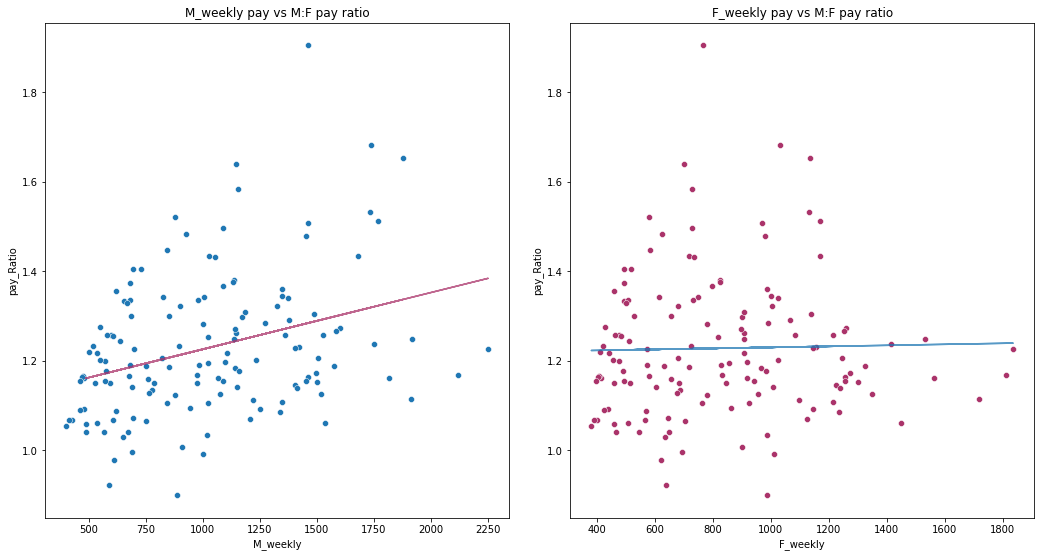

In [112]:
fig, axs = plt.subplots(1,2, figsize = (15,8))
fig.tight_layout(pad=3.0)
sns.scatterplot(data = gender_pay, y = 'pay_Ratio', x = 'M_weekly', ax=axs[0])
axs[0].plot(x_test_m, m_ypred, color = '#AA336A', alpha = 0.75)
axs[1].plot(x_test_f, f_ypred, alpha = 0.75)
sns.scatterplot(data = gender_pay, y = 'pay_Ratio', x = 'F_weekly', ax=axs[1], color='#AA336A')
axs[0].title.set_text('M_weekly pay vs M:F pay ratio')
axs[1].title.set_text('F_weekly pay vs M:F pay ratio')
plt.show()

## A clear difference

Between men and women, as the weekly pay for a male goes up in a job so does the pay ratio. For men the ratio rises at a rate of 0.00012 per dollar in weekly pay. For the women, the slope is almost flat with a rise of 0.000011 per dollar in weekly pay.


Text(0.5, 1.0, 'Pay Ratio vs All weekly pay')

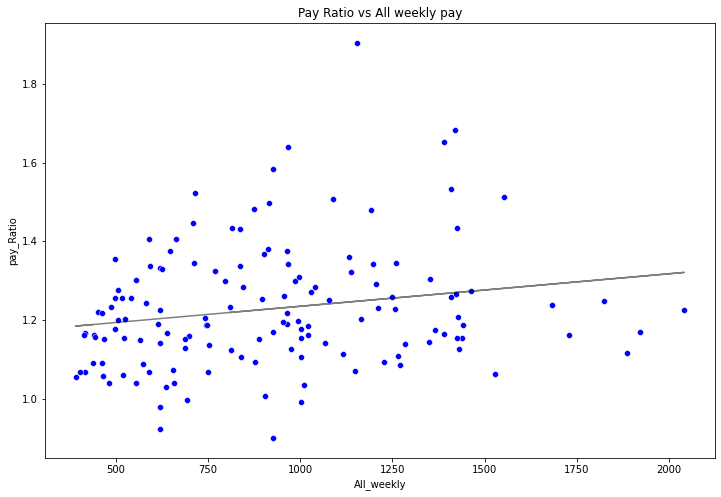

In [116]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = gender_pay, y = 'pay_Ratio', x = 'All_weekly',color = 'blue')
plt.plot(X, all_ypred, color = 'black', alpha = 0.5)
plt.title('Pay Ratio vs All weekly pay')
# plt.plot(X_m, m_ypred,color = 'blue')
# plt.plot(X_f, f_ypred, color = 'red')


## Check reliability of the model

Before making conclusions on the data Ill check how well the model predicts the pay ratio of an occupation based on the weekly salary of all workers, male workers and female workers.

In [145]:
print(regr.score(x_test,y_test))
print(regr_m.score(x_test_m,y_test_m))
print(regr_f.score(x_test_f,y_test_f))

0.03790320667776825
0.1110511949966877
0.0005411170891580497


0.05455258455665135
0.10989566804377227
-0.07203608475712331


## Model reliability

As seen above the models scored low showing that the it is not great at predicting what the pay ratio will be for a given occupation based on the weekly pay of all workers, male workers or female workers. Knowing this it can be hypothesized that data set does not contain enough information to draw conclusions of disparity solely based on the gender of the worker. There must be other factors that drive the noteable difference in pay for the two different genders.

## Data limitations

The data contains limited data that only examines occupation, gender and weekly wages of the worker. 
There are some variables that are not examined but could explain some differences with gender pay. Such as hours worked, job title, experience, education, and non monetary compensation. This is not an all inclusive list and may be appeneded to later in the project.

## Conclusions

Based on examination of the model of weekly pay by gender for selected occupations it can be concluced that there is a disparity between how much the average male makes on a weekly basis vs the average female. Since it is nearly impossible to predict wages based solely on occupation and gender it would be irresponsible to say that this is solely due to gender discrimination. Given that a disparity does exist it is necessary and prudent to further explore this issue with more data examining other factors that were listed in the data limitations such as hours worked, age, experience, etc. 